In [5]:
import nltk
import re
import string
#import unicodedata
import pandas as pd
import numpy as np
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import psutil as ps
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)
from scipy import stats
#import ipywidgets as widgets
#from ipywidgets import interact, interact_manual
from nltk.stem import WordNetLemmatizer 
#from nltk.corpus import stopwords
#import urllib.request
#import urllib.parse
#import urllib.error
#from bs4 import BeautifulSoup
#import ssl
#import json
#import ast
#import os
#from urllib.request import Request, urlopen

## Helper Functions

In [6]:
def count_unique():
    list_of_values = list(x)
    set_of_values = set(list_of_values)
    num_unique_values = len(set_of_values)
    return num_unique_values

In [7]:
def unique_values(series):
    return str(set(list(series)))[1:-1]

## Load Data from CSV

In [8]:
food_word_details_df = pd.read_csv('food_words_detailed.csv')
artist_regions_df = pd.read_csv('artist_regions.csv')

In [9]:
artist_regions_df = artist_regions_df.replace(np.nan,'None')

In [10]:
artist_food_word_stats_df = pd.read_csv('artist_food_word_stats.csv')

In [11]:
food_word_columns = list(artist_food_word_stats_df.columns)

In [12]:
artist_agg_stats_df = pd.read_csv('artist_agg_stats.csv')

In [13]:
artist_agg_stats_columns = list(artist_agg_stats_df.columns)

In [14]:
for file_num in range(2,25):
    artist_food_words = pd.read_csv('artist_food_word_stats{0}.csv'.format(file_num))
    artist_agg_stats = pd.read_csv('artist_agg_stats{0}.csv'.format(file_num))
    
    artist_food_word_stats_df = pd.concat([artist_food_word_stats_df,
                                           artist_food_words],
                                           axis=0,
                                           ignore_index=True,
                                         keys=food_word_columns)
    
    artist_agg_stats_df = pd.concat([artist_agg_stats_df,
                                     artist_agg_stats],
                                     axis=0,
                                     ignore_index=True,
                                   keys=artist_agg_stats_columns)
    
    

## Clean/Enrich Artist/Food Data
#### Create list of valid artists
#### Replace ASCII characters from artists and songs with a space
#### Delete punctuation characters
#### Standardize artists (e.g. replace 'notorious big' with 'the notorious big')
#### Standardize foods (e.g. replace 'creme' with 'cream')
#### Drop rows with NaN values in the artist column
#### Drop non-interesting food words
#### Add region data to artists
#### Add food labels to foods

In [15]:
valid_artists = ['the notorious big','2pac','nicki minaj','eminem','kendrick lamar','dr dre','nas','j cole','drake','rihanna','post malone','qtip','phife dawg','kid cudi','lil wayne','kanye west','jayz','beyonce','travis scott','juice wrld','dababy','cardi b','meek mill','rick ross','lizzo','21 savage','xxxtentacion','chris brown','kodak black','childish gambino','a boogie wit da hoodie','young thug','swae lee','slim jxmmi','dj khaled','offset','takeoff','quavo','tyler the creator','future','blueface','nipsey hussle','megan thee stallion','lil uzi vert','6ix9ine','trippie redd','sheck wes','lil baby','youngboy never broke again','geazy','lil pump','logic','sza','gucci mane','yg','gunna','ty dolla sign','tyga','asap rocky','asap ferg','her','big sean','french montana','playboi carti','2 chainz','chance the rapper','kyle','yo gotti','machine gun kelly','lil yachty','desiigner','kevin gates','fetty wap','tory lanez','frank ocean','jeezy','dram','wiz khalifa','schoolboy q','the game','macklemore','trey songz','iggy azalea','rich homie quan','flo rida','wale','jidenna','ludacris','pharrell williams','tierra whack','santigold','smino','amine','ti','bobby shmurda','bob','snoop dogg','juicy j','chief keef','ace hood','action bronson','mac miller','tpain','waka flocka flame','lupe fiasco','nelly','50 cent','beastie boys','timbaland','tee grizzley','black thought','birdman','andre 3000','big boi','the dream','plies','soulja boy tell em','fabolous','jadakiss','akon','david banner','camron','juelz santana','jim jones','chamillionaire','project pat','dj paul','skepta','e40','chingy','joey badass','royce da 59','nate dogg','denzel curry','atmosphere','aesop rock','pusha t','dmx','tech n9ne','ghostface killah','busta rhymes','method man','warren g','missy elliott','run dmc','icet','ski mask the slump god','twista','rich brian','rakim','ol dirty bastard','big l','big pun','gang starr','geto boys','xzibit','mf doom','coolio','fat joe','tlc','redman','vince staples','syd','raekwon','rza','gza','inspectah deck','scarface','afroman','ll cool j','mc hammer','grandmaster melle mel','kurtis blow','kool moe d','grandmaster caz','slick rick','krsone','too short','big daddy kane','public enemy','kool g rap','lauryn hill','wyclef jean','common','danny brown','lil kim','noname','solange','princess nokia','lil dicky','roddy rich','immortal technique','jay rock','talib kweli','doja cat','lil jon','queen latifah','ja rule','anderson paak','diddy','heavy d','doug e fresh','eve','rich the kid','mase','mac dre','remy ma','del the funky homosapien','mia','trina','andre nickatina','will smith','jaden smith','willow smith','lil peep','kevin abstract','matt champion','merlyn wood','dom mclennon','earl sweatshirt','casey veggies','mobb deep','de la soul','saltnpepa','bun b','pimp c','digable planets','cypress hill','jurassic 5','lloyd banks','currensy','ice cube','granata','kelis','yasiin bey','mike jones']

In [16]:
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist'].apply(lambda x: re.sub(r'[^\x00-\x7f]',r' ', str(x)))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: re.sub(r'\$',r's', str(x)))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: str(x).translate(str.maketrans('', '', string.punctuation)))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'the notorious big' if 'notorious big' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'the notorious big' if 'biggie smalls' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: '2pac' if 'tupac' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'soulja boy tell em' if 'soulja boy' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'youngboy never broke again' if 'nba youngboy' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'the game' if str(x) == 'the game' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'macklemore' if 'macklemore' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'pharrell williams' if 'pharrell' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'snoop dogg' if 'snoop dogg' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'snoop dogg' if 'snoop lion' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'run dmc' if str(x) == 'run' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'run dmc' if str(x) == 'dmc' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'run dmc' if str(x) == 'rundmc' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'grandmaster melle mel' if 'melle mel' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'public enemy' if str(x) == 'chuck d' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'public enemy' if str(x) == 'flava flav' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'diddy' if 'diddy' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'diddy' if str(x) == 'puff daddy' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'doug e fresh' if 'doug e fresh' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'de la soul' if 'posdnuos' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'de la soul' if 'maseo' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'de la soul' if 'trugoy' in str(x) else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'saltnpepa' if str(x) == 'salt' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'saltnpepa' if str(x) == 'pepa' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'digable planets' if str(x) == 'ladybug' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'digable planets' if str(x) == 'doodlebug' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'digable planets' if str(x) == 'butterfly' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'cypress hill' if str(x) == 'breal' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'cypress hill' if str(x) == 'dj muggs' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'cypress hill' if str(x) == 'sen dog' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'jurassic 5' if str(x) == 'chali 2na' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'jurassic 5' if str(x) == 'akil' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'jurassic 5' if str(x) == 'zaakir' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'jurassic 5' if str(x) == 'marc 7seven' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'missy elliott' if str(x) == 'missy elliot' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'syd' if str(x) == 'the internet' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'mc hammer' if str(x) == 'hammer' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'atmosphere' if str(x) == 'slug' else str(x))
artist_food_word_stats_df['artist_clean'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: 'yasiin bey' if str(x) == 'mos def' else str(x))
artist_food_word_stats_df['food_word'] = artist_food_word_stats_df['food_word'].apply(lambda x: 'm&m' if str(x) == 'mm' else str(x))
artist_food_word_stats_df['food_word'] = artist_food_word_stats_df['food_word'].apply(lambda x: 'cream' if str(x) == 'creme' else str(x))
artist_food_word_stats_df['food_word'] = artist_food_word_stats_df['food_word'].apply(lambda x: 'bubble gum' if str(x) == 'bubblegum' else str(x))
artist_food_word_stats_df['food_word'] = artist_food_word_stats_df['food_word'].apply(lambda x: 'barbeque' if str(x) == 'barbecue' else str(x))
artist_food_word_stats_df['food_word'] = artist_food_word_stats_df['food_word'].apply(lambda x: 'barbeque' if str(x) == 'bbq' else str(x))
artist_food_word_stats_df['food_word'] = artist_food_word_stats_df['food_word'].apply(lambda x: 'cheesecake' if str(x) == 'cheese cake' else str(x))
artist_food_word_stats_df['food_word'] = artist_food_word_stats_df['food_word'].apply(lambda x: 'donut' if str(x) == 'doughnut' else str(x))
artist_food_word_stats_df['valid_artist'] = artist_food_word_stats_df['artist_clean'].apply(lambda x: x in valid_artists)
artist_food_word_stats_df = artist_food_word_stats_df.loc[artist_food_word_stats_df.valid_artist == True]
artist_food_word_stats_df = artist_food_word_stats_df.dropna(subset=['artist_clean'])
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist'].apply(lambda x: re.sub(r'[^\x00-\x7f]',r' ', str(x)))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: re.sub(r'\$',r's', str(x)))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: str(x).translate(str.maketrans('', '', string.punctuation)))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'the notorious big' if 'notorious big' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'the notorious big' if 'biggie smalls' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: '2pac' if 'tupac' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'soulja boy tell em' if 'soulja boy' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'youngboy never broke again' if 'nba youngboy' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'the game' if str(x) == 'game' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'macklemore' if 'macklemore' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'pharrell williams' if 'pharrell' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'snoop dogg' if 'snoop dogg' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'snoop dogg' if 'snoop lion' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'run dmc' if str(x) == 'run' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'run dmc' if str(x) == 'dmc' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'run dmc' if str(x) == 'rundmc' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'grandmaster melle mel' if 'melle mel' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'public enemy' if str(x) == 'chuck d' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'public enemy' if str(x) == 'flava flav' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'diddy' if 'diddy' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'diddy' if str(x) == 'puff daddy' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'doug e fresh' if 'doug e fresh' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'de la soul' if 'posdnuos' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'de la soul' if 'trugoy' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'de la soul' if 'maseo' in str(x) else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'saltnpepa' if str(x) == 'salt' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'saltnpepa' if str(x) == 'pepa' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'digable planets' if str(x) == 'ladybug' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'digable planets' if str(x) == 'doodlebug' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'digable planets' if str(x) == 'butterfly' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'cypress hill' if str(x) == 'sen dog' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'cypress hill' if str(x) == 'breal' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'cypress hill' if str(x) == 'dj muggs' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'jurassic 5' if str(x) == 'chali 2na' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'jurassic 5' if str(x) == 'akil' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'jurassic 5' if str(x) == 'zaakir' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'jurassic 5' if str(x) == 'marc 7even' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'missy elliot' if str(x) == 'missy elliott' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'syd' if str(x) == 'the internet' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'mc hammer' if str(x) == 'hammer' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'atmosphere' if str(x) == 'slug' else str(x))
artist_agg_stats_df['artist_clean'] = artist_agg_stats_df['artist_clean'].apply(lambda x: 'yasiin bey' if str(x) == 'mos def' else str(x))
artist_agg_stats_df = artist_agg_stats_df.dropna(subset=['artist_clean'])
artist_agg_stats_df['valid_artist'] = artist_agg_stats_df['artist_clean'].apply(lambda x: x in valid_artists)
artist_agg_stats_df = artist_agg_stats_df.loc[artist_agg_stats_df.valid_artist == True]

In [17]:
## Drop duplicate songs from the food words and aggregated datasets
artist_food_word_stats_df = artist_food_word_stats_df.sort_values(by=['artist_clean',
                                                                      'song',
                                                                      'release_year']).drop_duplicates(['artist_clean',
                                                                                                       'song',
                                                                                                       'food_word'],keep='last')
artist_agg_stats_df = artist_agg_stats_df.sort_values(by=['artist_clean',
                                                          'song',
                                                          'release_year']).drop_duplicates(['artist_clean',
                                                                                            'song'],keep='last')


In [18]:
## For the artist food words df...
## Ignore non-interesting food words
food_words_to_ignore_list = ['drink', 'drinking', 'rose', 'cooking', 'pit', 'food', 'restaurant', 'boost', 'herbal', 'vegan', 'vegetarian', 'pan','flavor','iced','meal','roasting','stewed']
artist_food_word_stats_df['ignore_food_word'] = artist_food_word_stats_df['food_word'].apply(lambda x: x in food_words_to_ignore_list)
artist_food_word_stats_df = artist_food_word_stats_df.loc[artist_food_word_stats_df.ignore_food_word == False]
## Add food labels
artist_food_word_stats_df = pd.merge(artist_food_word_stats_df,food_word_details_df,left_on='food_word',right_on='food_description',how='left')
artist_food_word_stats_df = artist_food_word_stats_df.drop(columns=['food_description','food_description_word_length','food_words_included','food_word_net_effect_value'],axis=1)
## Add artist regions
artist_food_word_stats_df = pd.merge(artist_food_word_stats_df,artist_regions_df,left_on='artist_clean',right_on='artist',how='left')
artist_food_word_stats_df = artist_food_word_stats_df.rename(columns={'artist_x':'artist'})
artist_food_word_stats_df = artist_food_word_stats_df.drop(labels='artist_y',axis=1)

In [19]:
## For the artist aggregated df...
## Add artist regions
artist_agg_stats_df = pd.merge(artist_agg_stats_df,artist_regions_df,left_on='artist_clean',right_on='artist',how='left')
artist_agg_stats_df = artist_agg_stats_df.rename(columns={'artist_x':'artist'})
artist_agg_stats_df = artist_agg_stats_df.drop(labels='artist_y',axis=1)


# Top Food Words

In [20]:
top_food_words_df = artist_food_word_stats_df.groupby('food_word')[['food_word_count','artist_clean']].agg({'food_word_count':sum,'artist_clean':pd.Series.nunique})
top_food_words_df = top_food_words_df.reset_index()
top_food_words_df.columns = ['food_word','sum_of_food_word_count','count_of_unique_artists']

In [21]:
## Sort by frequency of food word or count of distinct artists
top_food_words_df = top_food_words_df.sort_values(by='sum_of_food_word_count',ascending=False)
## Top X food words based on metric chosen above
top_food_words_plot_df = top_food_words_df[:25]

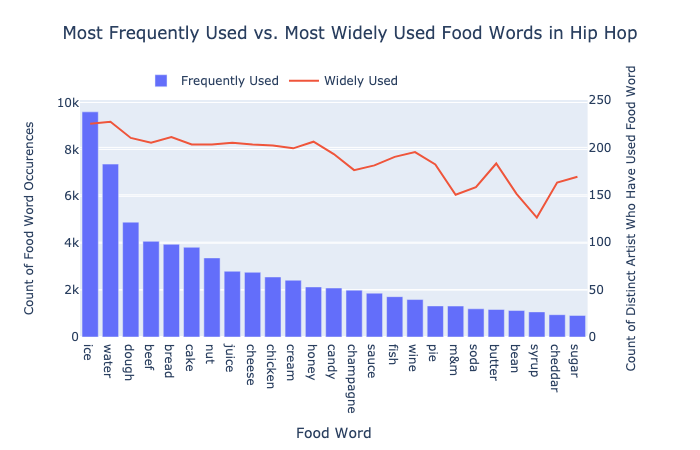

In [25]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=top_food_words_plot_df['food_word'],
               y=top_food_words_plot_df['sum_of_food_word_count'],
               name="Frequently Used"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=top_food_words_plot_df['food_word'],
               y=top_food_words_plot_df['count_of_unique_artists'],
               name="Widely Used"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Most Frequently Used vs. Most Widely Used Food Words in Hip Hop",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Food Word")

# Set y-axes titles
fig.update_yaxes(title_text="Count of Food Word Occurences", secondary_y=False)
fig.update_yaxes(title_font=dict(size=12))
fig.update_yaxes(title_text="Count of Distinct Artist Who Have Used Food Word", secondary_y=True)
fig.update_yaxes(range=[0,250], secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.6
))

fig.show(renderer="png")
#iplot(fig)
#pio.write_image(fig, 'fig1.png')
#pio.renderers
#pio.write_html(fig, file='figure.html', auto_open=True)

# Top Plant-Based Food Words

In [26]:
top_plant_based_food_words_df = artist_food_word_stats_df.loc[artist_food_word_stats_df.plant_based == 1].groupby('food_word')[['food_word_count','artist_clean']].agg({'food_word_count':sum,'artist_clean':pd.Series.nunique})
top_plant_based_food_words_df = top_plant_based_food_words_df.reset_index()
top_plant_based_food_words_df.columns = ['food_word','sum_of_food_word_count','count_of_unique_artists']

In [27]:
## Sort by frequency of food word or count of distinct artists
top_plant_based_food_words_df = top_plant_based_food_words_df.sort_values(by='sum_of_food_word_count',ascending=False)
## Top X food words based on metric chosen above
top_plant_based_food_words_plot_df = top_plant_based_food_words_df[:25]

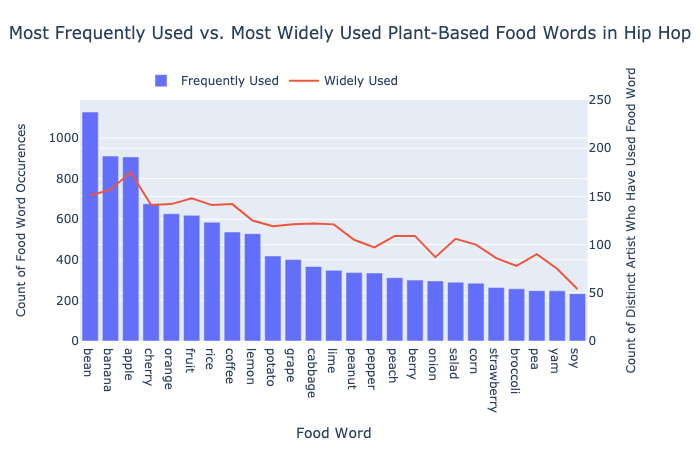

In [31]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=top_plant_based_food_words_plot_df['food_word'],
               y=top_plant_based_food_words_plot_df['sum_of_food_word_count'],
               name="Frequently Used"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=top_plant_based_food_words_plot_df['food_word'],
               y=top_plant_based_food_words_plot_df['count_of_unique_artists'],
               name="Widely Used"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Most Frequently Used vs. Most Widely Used Plant-Based Food Words in Hip Hop",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Food Word")

# Set y-axes titles
fig.update_yaxes(title_text="Count of Food Word Occurences", secondary_y=False)
fig.update_yaxes(title_font=dict(size=12))
fig.update_yaxes(title_text="Count of Distinct Artist Who Have Used Food Word", secondary_y=True)
fig.update_yaxes(range=[0,250], secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.6
))

fig.show(renderer="png")
#pio.write_html(fig, file='figure.html', auto_open=True)

# Top Meat Food Words

In [43]:
top_meat_food_words_df = artist_food_word_stats_df.loc[artist_food_word_stats_df.meat == 1].groupby('food_word')[['food_word_count','artist_clean']].agg({'food_word_count':sum,'artist_clean':pd.Series.nunique})
top_meat_food_words_df = top_meat_food_words_df.reset_index()
top_meat_food_words_df.columns = ['food_word','sum_of_food_word_count','count_of_unique_artists']

In [44]:
## Sort by frequency of food word or count of distinct artists
top_meat_food_words_df = top_meat_food_words_df.sort_values(by='sum_of_food_word_count',ascending=False)
## Top X food words based on metric chosen above
top_meat_food_words_plot_df = top_meat_food_words_df[:25]

In [45]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=top_meat_food_words_plot_df['food_word'],
               y=top_meat_food_words_plot_df['sum_of_food_word_count'],
               name="Frequently Used"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=top_meat_food_words_plot_df['food_word'],
               y=top_meat_food_words_plot_df['count_of_unique_artists'],
               name="Widely Used"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Most Frequently Used vs. Most Widely Used Meat Food Words in Hip Hop",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Food Word")

# Set y-axes titles
fig.update_yaxes(title_text="Count of Food Word Occurences", secondary_y=False)
fig.update_yaxes(title_text="Count of Distinct Artist Who Have Used Food Word", secondary_y=True)
fig.update_yaxes(range=[0,250], secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.6
))

fig.show()
#pio.write_html(fig, file='figure.html', auto_open=True)

# Top Sweets Food Words

In [46]:
top_sweets_food_words_df = artist_food_word_stats_df[artist_food_word_stats_df.sweets == 1].groupby(['food_word'])[['food_word_count','artist_clean']].agg({'food_word_count':sum,'artist_clean':pd.Series.nunique})
top_sweets_food_words_df = top_sweets_food_words_df.reset_index()
top_sweets_food_words_df.columns = ['food_word','sum_of_food_word_count','count_of_unique_artists']

In [47]:
## Sort by frequency of food word or count of distinct artists
top_sweets_food_words_df = top_sweets_food_words_df.sort_values(by='sum_of_food_word_count',ascending=False)
## Top X food words based on metric chosen above
top_sweets_food_words_plot_df = top_sweets_food_words_df[:25]

In [48]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=top_sweets_food_words_plot_df['food_word'],
               y=top_sweets_food_words_plot_df['sum_of_food_word_count'],
               name="Frequently Used"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=top_sweets_food_words_plot_df['food_word'],
               y=top_sweets_food_words_plot_df['count_of_unique_artists'],
               name="Widely Used"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Most Frequently Used vs. Most Widely Used Sweets Food Words in Hip Hop",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Food Word")

# Set y-axes titles
fig.update_yaxes(title_text="Count of Food Word Occurences", secondary_y=False)
fig.update_yaxes(title_text="Count of Distinct Artist Who Have Used Food Word", secondary_y=True)
fig.update_yaxes(range=[0,250], secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.6
))

fig.show()

# Artist - Food Word Exploration

In [156]:
## Calculate lyric word count & lyric word count excluding stopwords for all artists
## Calculate unique song count for all artists
all_artists_lyric_words_count = sum(artist_agg_stats_df['lyrics_word_count'])
all_artists_lyric_words_excl_sw_count = sum(artist_agg_stats_df['lyrics_word_count_excl_sw'])
all_artists_unique_songs_count = artist_agg_stats_df['song'].nunique()

In [157]:
## Calculate lyric word counts and unique song counts by artist
artist_lyric_and_song_counts = artist_agg_stats_df.groupby(['artist_clean','country','region','state','city']).agg({'lyrics_word_count':sum,
                                                                                'lyrics_word_count_excl_sw':sum,
                                                                                'song':pd.Series.nunique})
artist_lyric_and_song_counts = artist_lyric_and_song_counts.reset_index()
artist_lyric_and_song_counts.columns = ['artist_clean','country','region','state','city','total_lyric_words','total_lyric_words_excl_sw','unique_song_count']


In [158]:
## Calculate food word baseline probabilities
food_word_baseline_df = artist_food_word_stats_df.groupby('food_word').agg({'food_word_count':sum,'song':pd.Series.nunique})
food_word_baseline_df = food_word_baseline_df.reset_index()
food_word_baseline_df.columns = ['food_word','total_food_word_occurrence_count','food_word_unique_song_count']
food_word_baseline_df['food_word_baseline_prob_all_lyric_words'] = food_word_baseline_df['total_food_word_occurrence_count'] / all_artists_lyric_words_count
food_word_baseline_df['food_word_baseline_prob_lyric_words_excl_sw'] = food_word_baseline_df['total_food_word_occurrence_count'] / all_artists_lyric_words_excl_sw_count
food_word_baseline_df['food_word_baseline_prob_num_songs'] = food_word_baseline_df['food_word_unique_song_count'] / all_artists_unique_songs_count


In [159]:
## Calculate artist food word probabilities
artist_food_word_probs_df = artist_food_word_stats_df.groupby(['artist_clean','food_word','country','region','state','city']).agg({'food_word_count':sum,'song':[pd.Series.nunique,unique_values]})
artist_food_word_probs_df = artist_food_word_probs_df.reset_index()
artist_food_word_probs_df.columns = ['artist_clean','food_word','country','region','state','city','artist_food_word_count','artist_food_word_unique_song_count','artist_food_word_unique_songs']
## Merge artist total lyric and song counts with artist food word counts
artist_food_word_probs_df = pd.merge(artist_food_word_probs_df,artist_lyric_and_song_counts,on='artist_clean',how='left')
artist_food_word_probs_df['artist_food_word_prob_all_lyric_words'] = artist_food_word_probs_df['artist_food_word_count'] / artist_food_word_probs_df['total_lyric_words']
artist_food_word_probs_df['artist_food_word_prob_lyric_words_excl_sw'] = artist_food_word_probs_df['artist_food_word_count'] / artist_food_word_probs_df['total_lyric_words_excl_sw']
artist_food_word_probs_df['artist_food_word_prob_num_songs'] = artist_food_word_probs_df['artist_food_word_unique_song_count'] / artist_food_word_probs_df['unique_song_count']
### Merge food word baselines with artist food word probabilities
artist_food_word_probs_df = pd.merge(artist_food_word_probs_df,food_word_baseline_df,on='food_word',how='left')
artist_food_word_probs_df['artist_food_word_index_all_lyric_words'] = artist_food_word_probs_df['artist_food_word_prob_all_lyric_words'] / artist_food_word_probs_df['food_word_baseline_prob_all_lyric_words']
artist_food_word_probs_df['artist_food_word_index_lyric_words_excl_sw'] = artist_food_word_probs_df['artist_food_word_prob_lyric_words_excl_sw'] / artist_food_word_probs_df['food_word_baseline_prob_lyric_words_excl_sw']
artist_food_word_probs_df['artist_food_word_index_num_songs'] = artist_food_word_probs_df['artist_food_word_prob_num_songs'] / artist_food_word_probs_df['food_word_baseline_prob_num_songs']
### De-duplicate artist region data
artist_food_word_probs_df = artist_food_word_probs_df.drop(labels=['country_y','region_y','state_y','city_y'],axis=1)
artist_food_word_probs_df = artist_food_word_probs_df.rename(columns={'country_x':'country','region_x':'region','state_x':'state','city_x':'city'})

In [160]:
## Calculate total food word count, unique food word count by artist and merge with aggregate song lyric songs
artist_total_food_words_df = artist_food_word_probs_df.groupby(['artist_clean','country','region','state','city']).agg({'artist_food_word_count':sum,'food_word':pd.Series.nunique})
artist_total_food_words_df = artist_total_food_words_df.reset_index()
artist_total_food_words_df.columns = ['artist_clean','country','region','state','city','total_food_word_count','unique_food_word_count']
artist_total_food_words_df = pd.merge(artist_total_food_words_df,artist_lyric_and_song_counts[['artist_clean','total_lyric_words','total_lyric_words_excl_sw','unique_song_count']],on='artist_clean',how='left')
artist_total_food_words_df = artist_total_food_words_df.rename(columns={'unique_song_count':'total_song_count'})
## Calculate number of songs that include at least one mention of a food word
artist_songs_with_food_words_df = artist_agg_stats_df.loc[artist_agg_stats_df.food_words_count>0].groupby('artist_clean').agg({'song':pd.Series.nunique})
artist_songs_with_food_words_df = artist_songs_with_food_words_df.reset_index()
artist_songs_with_food_words_df.columns = ['artist_clean','total_songs_with_food_words']
## Calculate percentage of lyrics that are food and percentage of songs that include a food word
artist_total_food_words_df = pd.merge(artist_total_food_words_df,artist_songs_with_food_words_df,on='artist_clean',how='left')
artist_total_food_words_df['food_words_lyrics_prob'] = artist_total_food_words_df['total_food_word_count'] / artist_total_food_words_df['total_lyric_words']
artist_total_food_words_df['food_words_lyrics_excl_sw_prob'] = artist_total_food_words_df['total_food_word_count'] / artist_total_food_words_df['total_lyric_words_excl_sw']
artist_total_food_words_df['food_words_song_prob'] = artist_total_food_words_df['total_songs_with_food_words'] / artist_total_food_words_df['total_song_count']


# Top Artists Based on Food Word Usage - Percentage of Lyrics

In [161]:
results_limit = 25
sort_values_by = 'food_words_lyrics_prob'
#sort_values_by = 'total_food_word_count'

In [162]:
artist_food_lyrics_plot_df = artist_total_food_words_df.sort_values(by=sort_values_by,ascending=False)[:results_limit]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=artist_food_lyrics_plot_df['artist_clean'],
               y=artist_food_lyrics_plot_df['total_food_word_count'],
               name="Count of Total Food Word Mentions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=artist_food_lyrics_plot_df['artist_clean'],
               y=artist_food_lyrics_plot_df['food_words_lyrics_prob']*100,
               name="Percentage of Lyrics Comprised of Food Words"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Top {0} Artists by Percentage of Lyrics Comprised of Food Words".format(results_limit),
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Artist")

# Set y-axes titles
fig.update_yaxes(title_text="Total Food Word Count", secondary_y=False)
fig.update_yaxes(title_text="Percentage of Lyrics Comrpised of Food Words", secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.6
))

fig.show()

# Top Artists Based on Food Word Usage - Percentage of Songs

In [163]:
results_limit = 25
sort_values_by = 'food_words_song_prob'
#sort_values_by = 'total_songs_with_food_words'

In [164]:
artist_food_songs_plot_df = artist_total_food_words_df.sort_values(by=sort_values_by,ascending=False)[:results_limit]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=artist_food_songs_plot_df['artist_clean'],
               y=artist_food_songs_plot_df['total_songs_with_food_words'],
               name="Count of Songs in Which Food Words are Used"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=artist_food_songs_plot_df['artist_clean'],
               y=artist_food_songs_plot_df['food_words_song_prob']*100,
               name="Percentage of Songs in Which Food Words are Used"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Top {0} Artists by Percentage of Songs in Which Food Words are Used".format(results_limit),
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Artist")

# Set y-axes titles
fig.update_yaxes(title_text="Count of Songs in Which Food Words are Used", secondary_y=False)
fig.update_yaxes(title_text="Percentage of Songs in Which Food Words are Used", secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.6
))

fig.show()

# Most Distinct Food Words Mentioned

In [165]:
results_limit = 25

In [166]:
artist_distinct_food_words_plot_df = artist_total_food_words_df.sort_values(by='unique_food_word_count',ascending=False)[:results_limit]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=artist_distinct_food_words_plot_df['artist_clean'],
               y=artist_distinct_food_words_plot_df['unique_food_word_count'],
               name="Distinct Food Words Mentioned"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=artist_distinct_food_words_plot_df['artist_clean'],
               y=artist_distinct_food_words_plot_df['total_food_word_count'],
               name="Count of Total Food Word Mentions"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Top {0} Artists by Distinct Food Words Mentioned".format(results_limit),
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Artist")

# Set y-axes titles
fig.update_yaxes(title_text="Distinct Food Words Mentioned", secondary_y=False)
fig.update_yaxes(title_text="Count of Total Food Word Mentions", secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.6
))

fig.show()

In [167]:
artist_total_food_words_df[:5]

,artist_clean,country,region,state,city,total_food_word_count,unique_food_word_count,total_lyric_words,total_lyric_words_excl_sw,total_song_count,total_songs_with_food_words,food_words_lyrics_prob,food_words_lyrics_excl_sw_prob,food_words_song_prob
0,2 chainz,US,South,GA,Atlanta,1641,376,150120.0,85797.0,672.0,417.0,0.010931,0.019127,0.620536
1,21 savage,US,South,GA,Atlanta,555,132,89761.0,54906.0,303.0,187.0,0.006183,0.010108,0.617162
2,2pac,US,West,CA,None,635,121,395452.0,216612.0,915.0,399.0,0.001606,0.002932,0.436066
3,50 cent,US,East,NY,Queens,1028,188,214120.0,119145.0,675.0,356.0,0.004801,0.008628,0.527407
4,6ix9ine,US,East,NY,Brooklyn,141,39,35540.0,20784.0,142.0,60.0,0.003967,0.006784,0.422535


In [168]:
fig = px.scatter(artist_total_food_words_df, 
                 x="total_food_word_count", 
                 y="unique_food_word_count",
                hover_data=['artist_clean'])
# Add figure title
fig.update_layout(
    title={
        'text': "Gourmet vs. Gourmand: Unique Food Words vs. Total Food Words",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#fig.update_layout(xaxis_type="log", yaxis_type="log")
#fig.update_layout(yaxis_type="log")
fig.show()

# Top Food Words for Specific Artists

In [175]:
artist = 'mike jones'
artist_min_food_word_count = 3
artist_min_food_word_unique_song_count = 3
sort_results_by = 'artist_food_word_index_all_lyric_words'
#sort_results_by = 'artist_food_word_index_num_songs'
#sort_results_by = 'artist_food_word_count'
results_limit = 10

In [176]:
artist_food_word_plot_df = artist_food_word_probs_df.loc[(artist_food_word_probs_df.artist_clean == artist)
                                                         & (artist_food_word_probs_df.artist_food_word_count>=artist_min_food_word_count)
                                                        & (artist_food_word_probs_df.artist_food_word_unique_song_count>=artist_min_food_word_unique_song_count)]
artist_food_word_plot_df = artist_food_word_plot_df.sort_values(by=sort_results_by,ascending=False)[:results_limit]

In [177]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=artist_food_word_plot_df['food_word'],
               y=artist_food_word_plot_df['artist_food_word_index_all_lyric_words'],
               name="Food Word Mentions in Lyrics vs. Average Artist"),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=artist_food_word_plot_df['food_word'],
               y=artist_food_word_plot_df['artist_food_word_index_num_songs'],
               name="Food Word Mentions in Unique Songs vs. Average Artist"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=artist_food_word_plot_df['food_word'],
               y=artist_food_word_plot_df['artist_food_word_count'],
               name="Artist Food Word Total Mentions"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=artist_food_word_plot_df['food_word'],
               y=artist_food_word_plot_df['artist_food_word_unique_song_count'],
               name="Artist Food Word Unique Song Count"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Top {0} Food Words: {1}".format(results_limit,artist.title()),
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Food Word")

# Set y-axes titles
fig.update_yaxes(title_text="Index vs. Average Artist", secondary_y=False)
fig.update_yaxes(title_text="Count of Food Word Mentions by Artist", secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.7
))

fig.show()
df_below_plot = artist_food_word_plot_df[['artist_clean','food_word','artist_food_word_count','artist_food_word_unique_song_count','artist_food_word_index_all_lyric_words','artist_food_word_index_num_songs']].reset_index().drop(labels='index',axis=1)
df_below_plot.columns=['artist','food_word','food_word_count','unique_song_count','index_lyrics','index_songs']
df_below_plot

,artist,food_word,food_word_count,unique_song_count,index_lyrics,index_songs
0,mike jones,candy apple,7,3,88.263449,30.327592
1,mike jones,grain,81,33,57.083633,21.875640
2,mike jones,candy,90,43,20.099657,10.311531
3,mike jones,butter,46,20,18.279921,7.285908
4,mike jones,jelly,7,7,8.460486,7.890105
5,mike jones,dessert,3,3,8.330989,6.739465
6,mike jones,spinach,3,3,6.963215,5.245854
7,mike jones,syrup,14,8,6.098502,3.729041
8,mike jones,apple,8,4,4.114976,1.875329
9,mike jones,ice,82,39,3.984990,2.449763


## Top Songs for Artist & Food Word Combos

In [207]:
artist_food_word = 'candy apple'
results_limit = 10

In [208]:
artist_food_word_stats_df.loc[(artist_food_word_stats_df.food_word == artist_food_word)
                             & (artist_food_word_stats_df.artist_clean == artist)][['food_word','food_word_count','artist_clean','song']].sort_values(by='food_word_count',ascending=False)[:results_limit].reset_index().drop(labels='index',axis=1)

,food_word,food_word_count,artist_clean,song
0,candy apple,3,mike jones,hittin' switches
1,candy apple,3,mike jones,my 64
2,candy apple,1,mike jones,what ya know about


# Top Artists for Specific Food Words

In [224]:
food_word = 'pizza'
artist_min_food_word_count =3
artist_min_food_word_unique_song_count = 1
sort_results_by = 'artist_food_word_index_all_lyric_words'
#sort_results_by = 'artist_food_word_index_num_songs'
#sort_results_by = 'artist_food_word_count'
#sort_results_by = 'artist_min_food_word_unique_song_count'
results_limit = 10

In [225]:
food_word_top_artist_plot_df = artist_food_word_probs_df.loc[(artist_food_word_probs_df.food_word == food_word)
                                                             & (artist_food_word_probs_df.artist_food_word_count>=artist_min_food_word_count)
                                                            &(artist_food_word_probs_df.artist_food_word_unique_song_count>=artist_min_food_word_unique_song_count)]
food_word_top_artist_plot_df = food_word_top_artist_plot_df.sort_values(by=sort_results_by,ascending=False)[:results_limit]

In [226]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=food_word_top_artist_plot_df['artist_clean'],
               y=food_word_top_artist_plot_df['artist_food_word_index_all_lyric_words'],
               name="Mentions of {0} in Lyrics vs. Average Artist".format(food_word.title())),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=food_word_top_artist_plot_df['artist_clean'],
               y=food_word_top_artist_plot_df['artist_food_word_index_num_songs'],
               name="Mentions of {0} in Unique Songs vs. Average Artist".format(food_word.title())),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=food_word_top_artist_plot_df['artist_clean'],
               y=food_word_top_artist_plot_df['artist_food_word_count'],
               name="Total Mentions of {0}".format(food_word.title())),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=food_word_top_artist_plot_df['artist_clean'],
               y=food_word_top_artist_plot_df['artist_food_word_unique_song_count'],
               name="Unique Count of Songs in Which {0} is Mentioned".format(food_word.title())),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Top {0} Artists: {1}".format(results_limit,food_word.title()),
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Artist")

# Set y-axes titles
fig.update_yaxes(title_text="Index vs. Average Artist", secondary_y=False)
fig.update_yaxes(title_text="Count of Mentions", secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.7
))

fig.show()
df_below_plot = food_word_top_artist_plot_df[['food_word','artist_clean','artist_food_word_count','total_lyric_words','artist_food_word_unique_song_count','unique_song_count','artist_food_word_index_all_lyric_words','artist_food_word_index_num_songs']].reset_index().drop(labels='index',axis=1)
df_below_plot.columns=['food_word','artist','food_word_count','total_lyric_words_count','food_word_unique_song_count','total_unique_song_count','index_lyrics','index_songs']
df_below_plot

,food_word,artist,food_word_count,total_lyric_words_count,food_word_unique_song_count,total_unique_song_count,index_lyrics,index_songs
0,pizza,princess nokia,10,23239.0,3,79.0,27.544434,7.833654
1,pizza,tierra whack,3,9341.0,1,40.0,20.557920,5.157156
2,pizza,lupe fiasco,40,177501.0,8,447.0,14.424822,3.691924
3,pizza,digable planets,3,18223.0,3,41.0,10.537866,15.094115
4,pizza,smino,6,39981.0,3,128.0,9.606139,4.834834
5,pizza,ty dolla sign,19,134171.0,1,698.0,9.064550,0.295539
6,pizza,joey badass,10,85559.0,4,283.0,7.481447,2.915706
7,pizza,lil dicky,6,53002.0,3,92.0,7.246199,6.726725
8,pizza,megan thee stallion,5,48625.0,4,119.0,6.582058,6.933991
9,pizza,ski mask the slump god,7,83453.0,3,360.0,5.369173,1.719052


## Top Songs for Food Word & Artist Combos

In [251]:
food_word_artist = 'princess nokia'
results_limit = 100

In [252]:
artist_food_word_stats_df.loc[(artist_food_word_stats_df.food_word == food_word)
                             & (artist_food_word_stats_df.artist_clean == food_word_artist)][['food_word','food_word_count','artist_clean','song']].sort_values(by='food_word_count',ascending=False)[:results_limit].reset_index().drop(labels='index',axis=1)

,food_word,food_word_count,artist_clean,song
0,pizza,8,princess nokia,chinese slippers
1,pizza,1,princess nokia,dame aquí
2,pizza,1,princess nokia,versace hottie


## Regional Patterns

In [180]:
## Calculate lyric word counts and unique song counts by region, state, city
region_lyric_and_song_counts = artist_agg_stats_df.groupby(['region']).agg({'lyrics_word_count':sum,
                                                                                'lyrics_word_count_excl_sw':sum,
                                                                                'song':pd.Series.nunique})
region_lyric_and_song_counts = region_lyric_and_song_counts.reset_index()
region_lyric_and_song_counts.columns = ['region','total_lyric_words','total_lyric_words_excl_sw','unique_song_count']

state_lyric_and_song_counts = artist_agg_stats_df.groupby(['state']).agg({'lyrics_word_count':sum,
                                                                                'lyrics_word_count_excl_sw':sum,
                                                                                'song':pd.Series.nunique})
state_lyric_and_song_counts = state_lyric_and_song_counts.reset_index()
state_lyric_and_song_counts.columns = ['state','total_lyric_words','total_lyric_words_excl_sw','unique_song_count']

city_lyric_and_song_counts = artist_agg_stats_df.groupby(['city']).agg({'lyrics_word_count':sum,
                                                                                'lyrics_word_count_excl_sw':sum,
                                                                                'song':pd.Series.nunique})
city_lyric_and_song_counts = city_lyric_and_song_counts.reset_index()
city_lyric_and_song_counts.columns = ['city','total_lyric_words','total_lyric_words_excl_sw','unique_song_count']


## Region Analysis

In [181]:
## Calculate region food word probabilities
region_food_word_probs_df = artist_food_word_stats_df.groupby(['food_word','region']).agg({'food_word_count':sum,'song':[pd.Series.nunique,unique_values],'artist_clean':[pd.Series.nunique,unique_values]})
region_food_word_probs_df = region_food_word_probs_df.reset_index()
region_food_word_probs_df.columns = ['food_word','region','region_food_word_count','region_food_word_unique_song_count','region_food_word_unique_songs','region_food_word_unique_artist_count','region_food_word_unique_artists']
## Merge artist total lyric and song counts with artist food word counts
region_food_word_probs_df = pd.merge(region_food_word_probs_df,region_lyric_and_song_counts,on='region',how='left')
region_food_word_probs_df['region_food_word_prob_all_lyric_words'] = region_food_word_probs_df['region_food_word_count'] / region_food_word_probs_df['total_lyric_words']
region_food_word_probs_df['region_food_word_prob_lyric_words_excl_sw'] = region_food_word_probs_df['region_food_word_count'] / region_food_word_probs_df['total_lyric_words_excl_sw']
region_food_word_probs_df['region_food_word_prob_num_songs'] = region_food_word_probs_df['region_food_word_unique_song_count'] / region_food_word_probs_df['unique_song_count']
### Merge food word baselines with artist food word probabilities
region_food_word_probs_df = pd.merge(region_food_word_probs_df,food_word_baseline_df,on='food_word',how='left')
region_food_word_probs_df['region_food_word_index_all_lyric_words'] = region_food_word_probs_df['region_food_word_prob_all_lyric_words'] / region_food_word_probs_df['food_word_baseline_prob_all_lyric_words']
region_food_word_probs_df['region_food_word_index_lyric_words_excl_sw'] = region_food_word_probs_df['region_food_word_prob_lyric_words_excl_sw'] / region_food_word_probs_df['food_word_baseline_prob_lyric_words_excl_sw']
region_food_word_probs_df['region_food_word_index_num_songs'] = region_food_word_probs_df['region_food_word_prob_num_songs'] / region_food_word_probs_df['food_word_baseline_prob_num_songs']


## Top Foods - Search by Region (East, South, West, Midwest)

In [183]:
region = 'South'
region_min_food_word_count =3
region_min_food_word_unique_song_count = 3
region_min_artist_food_word_count = 5
sort_results_by = 'region_food_word_index_all_lyric_words'
#sort_results_by = 'region_food_word_index_num_songs'
#sort_results_by = 'region_food_word_count'
results_limit = 25

In [184]:
region_food_word_plot_df = region_food_word_probs_df.loc[(region_food_word_probs_df.region == region)
                                                         & (region_food_word_probs_df.region_food_word_count>=region_min_food_word_count)
                                                        & (region_food_word_probs_df.region_food_word_unique_song_count>=region_min_food_word_unique_song_count)
                                                        & (region_food_word_probs_df.region_food_word_unique_artist_count>=region_min_artist_food_word_count)]
region_food_word_plot_df = region_food_word_plot_df.sort_values(by=sort_results_by,ascending=False)[:results_limit]


In [185]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=region_food_word_plot_df['food_word'],
               y=region_food_word_plot_df['region_food_word_index_all_lyric_words'],
               name="Food Word Mentions in Lyrics vs. Average"),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=region_food_word_plot_df['food_word'],
               y=region_food_word_plot_df['region_food_word_index_num_songs'],
               name="Food Word Mentions in Unique Songs vs. Average"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=region_food_word_plot_df['food_word'],
               y=region_food_word_plot_df['region_food_word_count'],
               name="Region Food Word Total Mentions"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=region_food_word_plot_df['food_word'],
               y=region_food_word_plot_df['region_food_word_unique_song_count'],
               name="Region Food Word Unique Song Count"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Top {0} Food Words: {1}".format(results_limit,region.title()),
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Food Word")

# Set y-axes titles
fig.update_yaxes(title_text="Index vs. Average", secondary_y=False)
fig.update_yaxes(title_text="Count of Food Word Mentions by Region", secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.7
))

fig.show()
df_below_plot = region_food_word_plot_df[['region','food_word','region_food_word_count','region_food_word_unique_song_count','region_food_word_unique_artist_count','region_food_word_index_all_lyric_words','region_food_word_index_num_songs','region_food_word_unique_artists']].reset_index().drop(labels='index',axis=1)
df_below_plot.columns=['region','food_word','food_word_count','unique_song_count','unique_artist_count','index_lyrics','index_songs','food_word_artists']
df_below_plot

,region,food_word,food_word_count,unique_song_count,unique_artist_count,index_lyrics,index_songs,food_word_artists
0,South,egg yolk,18,11,7,2.540935,2.188920,"'young thug', 'gucci mane', 'soulja boy tell e..."
1,South,coffee bean,12,9,6,2.475783,2.149121,"'gucci mane', 'pusha t', 'juicy j', 'travis sc..."
2,South,crab cake,15,13,8,2.366557,2.069524,"'young thug', 'rick ross', 'gucci mane', '2 ch..."
3,South,orville redenbacher,15,10,7,2.366557,1.989927,"'bun b', 'merlyn wood', 'gucci mane', '2 chain..."
4,South,froot loop,14,10,8,2.346836,1.989927,"'waka flocka flame', 'offset', 'young thug', '..."
5,South,slimfast,7,7,5,2.346836,2.089424,"'young thug', 'lil yachty', 'gucci mane', 'tpa..."
6,South,wedding cake,20,8,5,2.332259,1.736664,"'gucci mane', 'soulja boy tell em', 'childish ..."
7,South,spinach dip,6,6,6,2.298941,2.046782,"'pimp c', 'rick ross', '2 chainz', 'wale', 'ju..."
8,South,fettuccine,83,26,15,2.294991,1.552143,"'offset', 'young thug', 'bun b', 'gucci mane',..."
9,South,gelato,106,50,19,2.221112,1.755818,"'kodak black', 'lil yachty', 'soulja boy tell ..."


## City Analysis

In [186]:
## Calculate region food word probabilities
city_food_word_probs_df = artist_food_word_stats_df.groupby(['food_word','city']).agg({'food_word_count':sum,'song':[pd.Series.nunique,unique_values],'artist_clean':[pd.Series.nunique,unique_values]})
city_food_word_probs_df = city_food_word_probs_df.reset_index()
city_food_word_probs_df.columns = ['food_word','city','city_food_word_count','city_food_word_unique_song_count','city_food_word_unique_songs','city_food_word_unique_artist_count','city_food_word_unique_artists']
## Merge artist total lyric and song counts with artist food word counts
city_food_word_probs_df = pd.merge(city_food_word_probs_df,city_lyric_and_song_counts,on='city',how='left')
city_food_word_probs_df['city_food_word_prob_all_lyric_words'] = city_food_word_probs_df['city_food_word_count'] / city_food_word_probs_df['total_lyric_words']
city_food_word_probs_df['city_food_word_prob_lyric_words_excl_sw'] = city_food_word_probs_df['city_food_word_count'] / city_food_word_probs_df['total_lyric_words_excl_sw']
city_food_word_probs_df['city_food_word_prob_num_songs'] = city_food_word_probs_df['city_food_word_unique_song_count'] / city_food_word_probs_df['unique_song_count']
### Merge food word baselines with artist food word probabilities
city_food_word_probs_df = pd.merge(city_food_word_probs_df,food_word_baseline_df,on='food_word',how='left')
city_food_word_probs_df['city_food_word_index_all_lyric_words'] = city_food_word_probs_df['city_food_word_prob_all_lyric_words'] / city_food_word_probs_df['food_word_baseline_prob_all_lyric_words']
city_food_word_probs_df['city_food_word_index_lyric_words_excl_sw'] = city_food_word_probs_df['city_food_word_prob_lyric_words_excl_sw'] / city_food_word_probs_df['food_word_baseline_prob_lyric_words_excl_sw']
city_food_word_probs_df['city_food_word_index_num_songs'] = city_food_word_probs_df['city_food_word_prob_num_songs'] / city_food_word_probs_df['food_word_baseline_prob_num_songs']


## Top Foods - Search by City

In [190]:
city = 'Miami'
city_min_food_word_count = 3
city_min_food_word_unique_song_count = 3
city_min_artist_food_word_count = 3
sort_results_by = 'city_food_word_index_all_lyric_words'
#sort_results_by = 'city_food_word_index_num_songs'
#sort_results_by = 'city_food_word_count'
results_limit = 25

In [191]:
city_food_word_plot_df = city_food_word_probs_df.loc[(city_food_word_probs_df.city == city)
                                                     & (city_food_word_probs_df.city_food_word_count >= city_min_food_word_count)
                                                     & (city_food_word_probs_df.city_food_word_unique_song_count >= city_min_food_word_unique_song_count)
                                                     & (city_food_word_probs_df.city_food_word_unique_artist_count >= city_min_artist_food_word_count)]
city_food_word_plot_df = city_food_word_plot_df.sort_values(by=sort_results_by,ascending=False)[:results_limit]


In [192]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=city_food_word_plot_df['food_word'],
               y=city_food_word_plot_df['city_food_word_index_all_lyric_words'],
               name="Food Word Mentions in Lyrics vs. Average"),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=city_food_word_plot_df['food_word'],
               y=city_food_word_plot_df['city_food_word_index_num_songs'],
               name="Food Word Mentions in Unique Songs vs. Average"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=city_food_word_plot_df['food_word'],
               y=city_food_word_plot_df['city_food_word_count'],
               name="City Food Word Total Mentions"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=city_food_word_plot_df['food_word'],
               y=city_food_word_plot_df['city_food_word_unique_song_count'],
               name="City Food Word Unique Song Count"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Top {0} Food Words: {1}".format(results_limit,city.title()),
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="Food Word")

# Set y-axes titles
fig.update_yaxes(title_text="Index vs. Average", secondary_y=False)
fig.update_yaxes(title_text="Count of Food Word Mentions by City", secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.7
))

fig.show()
df_below_plot = city_food_word_plot_df[['city','food_word','city_food_word_count','city_food_word_unique_song_count','city_food_word_unique_artist_count','city_food_word_index_all_lyric_words','city_food_word_index_num_songs','city_food_word_unique_artists']].reset_index().drop(labels='index',axis=1)
df_below_plot.columns=['city','food_word','food_word_count','unique_song_count','unique_artist_count','index_lyrics','index_songs','food_word_artists']
df_below_plot

,city,food_word,food_word_count,unique_song_count,unique_artist_count,index_lyrics,index_songs,food_word_artists
0,Miami,curry,123,77,4,13.362044,7.784386,"'denzel curry', 'rick ross', 'flo rida', 'ski ..."
1,Miami,duck sauce,3,3,3,11.352305,6.394317,"'rick ross', 'trina', 'ski mask the slump god'"
2,Miami,betty crocker,13,3,3,8.555361,1.565955,"'trina', 'flo rida', 'ski mask the slump god'"
3,Miami,smoothie,6,6,3,8.013392,4.950439,"'denzel curry', 'lil pump', 'rick ross'"
4,Miami,glaze,8,3,3,7.265475,1.918295,"'denzel curry', 'rick ross', 'ski mask the slu..."
5,Miami,ramen noodle,8,7,3,6.054563,3.141068,"'rick ross', 'flo rida', 'ski mask the slump god'"
6,Miami,chardonnay,7,7,4,5.480423,4.262878,"'denzel curry', 'rick ross', 'trina', 'ski mas..."
7,Miami,starbucks,7,7,4,5.210894,3.378130,"'rick ross', 'trina', 'flo rida', 'ski mask th..."
8,Miami,sage,6,5,4,4.953733,2.557727,"'denzel curry', 'rick ross', 'flo rida', 'ski ..."
9,Miami,m&m,139,47,3,4.781729,2.193671,"'denzel curry', 'rick ross', 'ski mask the slu..."


# Top City Foods - Search by Food

In [241]:
city_food_word = 'pizza'
city_min_food_word_count = 3
city_min_food_word_unique_song_count = 3
city_min_artist_food_word_count = 3
sort_results_by = 'city_food_word_index_all_lyric_words'
#sort_results_by = 'city_food_word_index_num_songs'
#sort_results_by = 'city_food_word_count'
results_limit = 25

In [248]:
food_city_word_plot_df = city_food_word_probs_df.loc[(city_food_word_probs_df.food_word == city_food_word)
                                                     & (city_food_word_probs_df.city_food_word_count >= city_min_food_word_count)
                                                     & (city_food_word_probs_df.city_food_word_unique_song_count >= city_min_food_word_unique_song_count)
                                                     & (city_food_word_probs_df.city_food_word_unique_artist_count >= city_min_artist_food_word_count)]
food_city_word_plot_df = food_city_word_plot_df.sort_values(by=sort_results_by,ascending=False)[:results_limit]


In [249]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=food_city_word_plot_df['city'],
               y=food_city_word_plot_df['city_food_word_index_all_lyric_words'],
               name="Food Word Mentions in Lyrics vs. Average"),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=food_city_word_plot_df['city'],
               y=food_city_word_plot_df['city_food_word_index_num_songs'],
               name="Food Word Mentions in Unique Songs vs. Average"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=food_city_word_plot_df['city'],
               y=food_city_word_plot_df['city_food_word_count'],
               name="City Food Word Total Mentions"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=food_city_word_plot_df['city'],
               y=food_city_word_plot_df['city_food_word_unique_song_count'],
               name="City Food Word Unique Song Count"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title={
        'text': "Top {0} Cities: {1}".format(results_limit,city_food_word.title()),
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

# Set x-axis title
fig.update_xaxes(title_text="City")

# Set y-axes titles
fig.update_yaxes(title_text="Index vs. Average", secondary_y=False)
fig.update_yaxes(title_text="Count of Food Word Mentions by City", secondary_y=True)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.7
))

fig.show()
df_below_plot = food_city_word_plot_df[['city','food_word','city_food_word_count','city_food_word_unique_song_count','city_food_word_unique_artist_count','city_food_word_index_all_lyric_words','city_food_word_index_num_songs','city_food_word_unique_artists']].reset_index().drop(labels='index',axis=1)
df_below_plot.columns=['city','food_word','food_word_count','unique_song_count','unique_artist_count','index_lyrics','index_songs','food_word_artists']
df_below_plot

,city,food_word,food_word_count,unique_song_count,unique_artist_count,index_lyrics,index_songs,food_word_artists
0,Chicago,pizza,61,29,6,2.621508,1.387039,"'chief keef', 'chance the rapper', 'juice wrld..."
1,Harlem,pizza,25,16,7,2.041349,1.294345,"'princess nokia', 'camron', 'jim jones', 'juel..."
2,Detroit,pizza,18,14,5,1.481750,1.444004,"'big sean', 'eminem', 'royce da 59', 'danny br..."
3,Philadelphia,pizza,13,8,4,1.262272,0.851982,"'lil dicky', 'meek mill', 'tierra whack', 'lil..."
4,Houston,pizza,12,10,3,1.251118,1.172747,"'megan thee stallion', 'chamillionaire', 'trav..."
5,Miami,pizza,10,6,3,1.129583,0.556028,"'rick ross', 'flo rida', 'ski mask the slump god'"
6,Brooklyn,pizza,25,19,7,1.106529,0.908539,"'the notorious big', 'jayz', 'busta rhymes', '..."
7,Los Angeles,pizza,47,29,13,1.081077,0.706877,"'ice cube', 'ty dolla sign', 'earl sweatshirt'..."
8,Atlanta,pizza,70,42,17,1.070613,0.779840,"'waka flocka flame', 'offset', 'young thug', '..."
9,Bronx,pizza,7,5,4,0.857592,0.544866,"'big pun', 'slick rick', 'remy ma', 'cardi b'"
